## **Importer de librarie**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
path = "/content/drive/My Drive/Sol intelligent"
os.chdir(path)

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse
from itertools import tee
import math
import pydot
from IPython.display import Image, display

import importlib
# Installer la librairie au cas inexistante
if importlib.util.find_spec("missingno") is None:
  !pip install --user --upgrade missingno

Mounted at /content/drive


## **Télécharger les données à partir du fichier Excel**

In [ ]:
# Importer les données de tableau 'Evénements'
data_evenement = pd.read_excel("Roubaix - Donnees_2020.xlsx", sheet_name=1)

# Supprimer les enregistrements avec Type='Intrusion' et Type='Manquant'
data_evenement.drop(data_evenement[data_evenement.Type == 'Manquant'].index, inplace=True)

def inspect_data(df=None, visualize_missing_value=False, display_form='matrix', freq=None, figsize=(6,4)):
  """Fonction à inspecter les données et à visualiser les valeurs manquantes 
  - Paramters:
    df: DataFrame/Series
    visualize_missing_value: visualiser les valeurs manquantes, default False par défaut 
    display_form: figure de type utilisée pour visualiser les valeurs manquantes, 'matrix'(part default), 'bar', 'heatmap'
    figsize: taille de figure
    freq: Specifier la périodicité de donnnée, 'D' par default 
  """
  print(df.info())
  print(">>> Les premières cinq lignes de données: \n", df.head())
  if visualize_missing_value == True:
    print(">>> Visualization de valeurs manquantes(La ligne blanche signifique la valeur maquantes):")
    if display_form == 'matrix':
      if freq is not None:
        msno.matrix(df, freq=freq, figsize=figsize)
      else:
        msno.matrix(df, figsize=figsize)
    if display_form == 'bar':
      msno.bar(df, figsize=figsize)
    if display_form == 'heatmap':
      msno.heatmap(df, figsize=figsize)
  plt.show()
  return
# Inspecter les données 
inspect_data(data_evenement, visualize_missing_value=False) # Pas de valeurs manquantes

# Afficher les types d'événement
print("\nType d'événement de logement: ", data_evenement['Type'].unique())

# Copier les données 
evenement = data_evenement.copy()

# Convertir variable 'Type' en forme numérique
"""
  Entrée Chambre - 1
  Sortie Lit - 2 
  Entrée Balcon - 3
  Entrée BalconTIME - 4
  Entrée WC - 5
  Temps long WC -6
  Chute - 7
  Présence - 8
  Acquittement - 9
  Sortie Chambre - 10
  Intrusion - 11
"""
evenement['Type'] = evenement['Type'].map({'Entrée Chambre':1, 'Sortie Lit':2, 'Entrée Balcon': 3, 'Entrée BalconTIME':4, 'Entrée WC':5, 'Temps long WC':6, 'Chute':7, 'Présence':8, 'Acquittement': 9,  'Sortie Chambre':10, 'Intrusion':11})

# Concactener les colonnes 'Date' et 'Heure' en 'Periode_debut'
evenement['Periode_debut'] = evenement[['Date', 'Heure']].astype(str).agg('T'.join, axis=1)
evenement['Periode_debut'] = evenement['Periode_debut'].apply(lambda x: parse(x))

# Extraire la partie '%H:%M' de 'Periode_debut' servant à la visualisation
evenement['Heure_minute_debut'] = evenement['Periode_debut'].apply(lambda x: x.strftime('%H:%M'))
# Ajouter la colonne 'Jour_de_semaine' servant à explorer les habitudes différents pendant 'day-of-week' et 'weekend'
evenement['Jour_de_semaine'] = evenement['Date'].apply(lambda x: x.weekday())
 
# Mettre à jour les indices en 'Date'
evenement.set_index('Date', inplace=True)

# Trier les données par critères ['Periode_debut', 'Logement']
evenement.sort_values(by=['Periode_debut', 'Logement'], inplace=True)

# Diviser les données d'événement selon numéro de logement
evenement_logement_1 = evenement[evenement.Logement == 1]
evenement_logement_2 = evenement[evenement.Logement == 2]
evenement_logement_3 = evenement[evenement.Logement == 3]
evenement_logement_4 = evenement[evenement.Logement == 4]
evenement_logement_5 = evenement[evenement.Logement == 5]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79599 entries, 0 to 79622
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      79599 non-null  datetime64[ns]
 1   Heure     79599 non-null  object        
 2   Logement  79599 non-null  int64         
 3   Type      79599 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ MB
None
>>> Les premières cinq lignes de données: 
         Date               Heure  Logement            Type
0 2020-04-26  13:44:14.901013+01         5  Entrée Chambre
1 2020-05-27  08:31:54.911067+01         2      Sortie Lit
2 2020-04-27  22:56:51.415199+01         3       Intrusion
3 2020-05-15   04:15:23.89014+01         2   Entrée Balcon
4 2020-04-29  12:48:15.589654+01         3       Intrusion

Type d'événement de logement:  ['Entrée Chambre' 'Sortie Lit' 'Intrusion' 'Entrée Balcon' 'Entrée WC'
 'Sortie Chambre' 'Chute' 'Présence' 'Acq

In [ ]:
# Importer les données de tableau 'Activité'
data_activite = pd.read_excel("Roubaix - Donnees_2020.xlsx", sheet_name=0)

# Inspecter les données 
inspect_data(data_activite, visualize_missing_value=False) # Pas de valeurs manquantes

# Afficher les types d'activité
print("Type d'activité de logement: ", data_activite['Type'].unique())

# Copier les données 
activite = data_activite.copy()

# Convertir variable 'Type' en forme numérique
"""
  motion - 12
  bedtime - 13
"""
activite['Type'] = activite['Type'].map({'motion':12, 'bedtime':13})

# Concactener les colonnes 'Date début' et 'Heure debut'
activite['Periode_debut'] = activite[['Date début', 'Heure début']].astype(str).agg('T'.join, axis=1)
# Concactener les colonnes 'Date début' et 'Heure fin'
activite['Periode_fin'] = activite[['Date début', 'Heure fin']].astype(str).agg('T'.join, axis=1)

activite['Periode_debut'] = activite['Periode_debut'].apply(lambda x: parse(x))
activite['Periode_fin'] = activite['Periode_fin'].apply(lambda x: parse(x))

# Extraire la partie '%H:%M' de date
activite['Heure_minute_debut'] = activite['Periode_debut'].apply(lambda x: x.strftime('%H:%M'))
activite['Heure_minute_fin'] = activite['Periode_fin'].apply(lambda x: x.strftime('%H:%M'))

# Mettre à jour les indices en 'Date début'
activite.set_index('Date début', inplace=True)

# Trier les données par critères ['Date', 'Logement', 'Heure']
activite.sort_values(by=['Date début', 'Logement', 'Heure début'], inplace=True)

# Convertir l'unité de seconde(s) en minute(m) et heure(h) servant aux calculs statitistiques
activite['Temps (m)'] = activite['Temps (s)'] / 60
activite['Temps (h)'] = activite['Temps (s)'] / 3600

# Diviser les données d'activité selon numéro de logement
activite_logement_1 = activite[activite.Logement == 1]
activite_logement_2 = activite[activite.Logement == 2]
activite_logement_3 = activite[activite.Logement == 3]
activite_logement_4 = activite[activite.Logement == 4]
activite_logement_5 = activite[activite.Logement == 5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391979 entries, 0 to 391978
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Logement     391979 non-null  int64         
 1   Date début   391979 non-null  datetime64[ns]
 2   Heure début  391979 non-null  object        
 3   Date fin     391979 non-null  datetime64[ns]
 4   Heure fin    391979 non-null  object        
 5   Type         391979 non-null  object        
 6   Temps (s)    391979 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 20.9+ MB
None
>>> Les premières cinq lignes de données: 
    Logement Date début  ...     Type    Temps (s)
0         3 2020-05-04  ...   motion     3.978731
1         3 2020-05-05  ...   motion     3.606410
2         3 2020-05-05  ...   motion     4.479318
3         5 2020-05-06  ...  bedtime  1126.192065
4         3 2020-05-06  ...   motion     3.988650

[5 rows 

## **Visualisation de données**

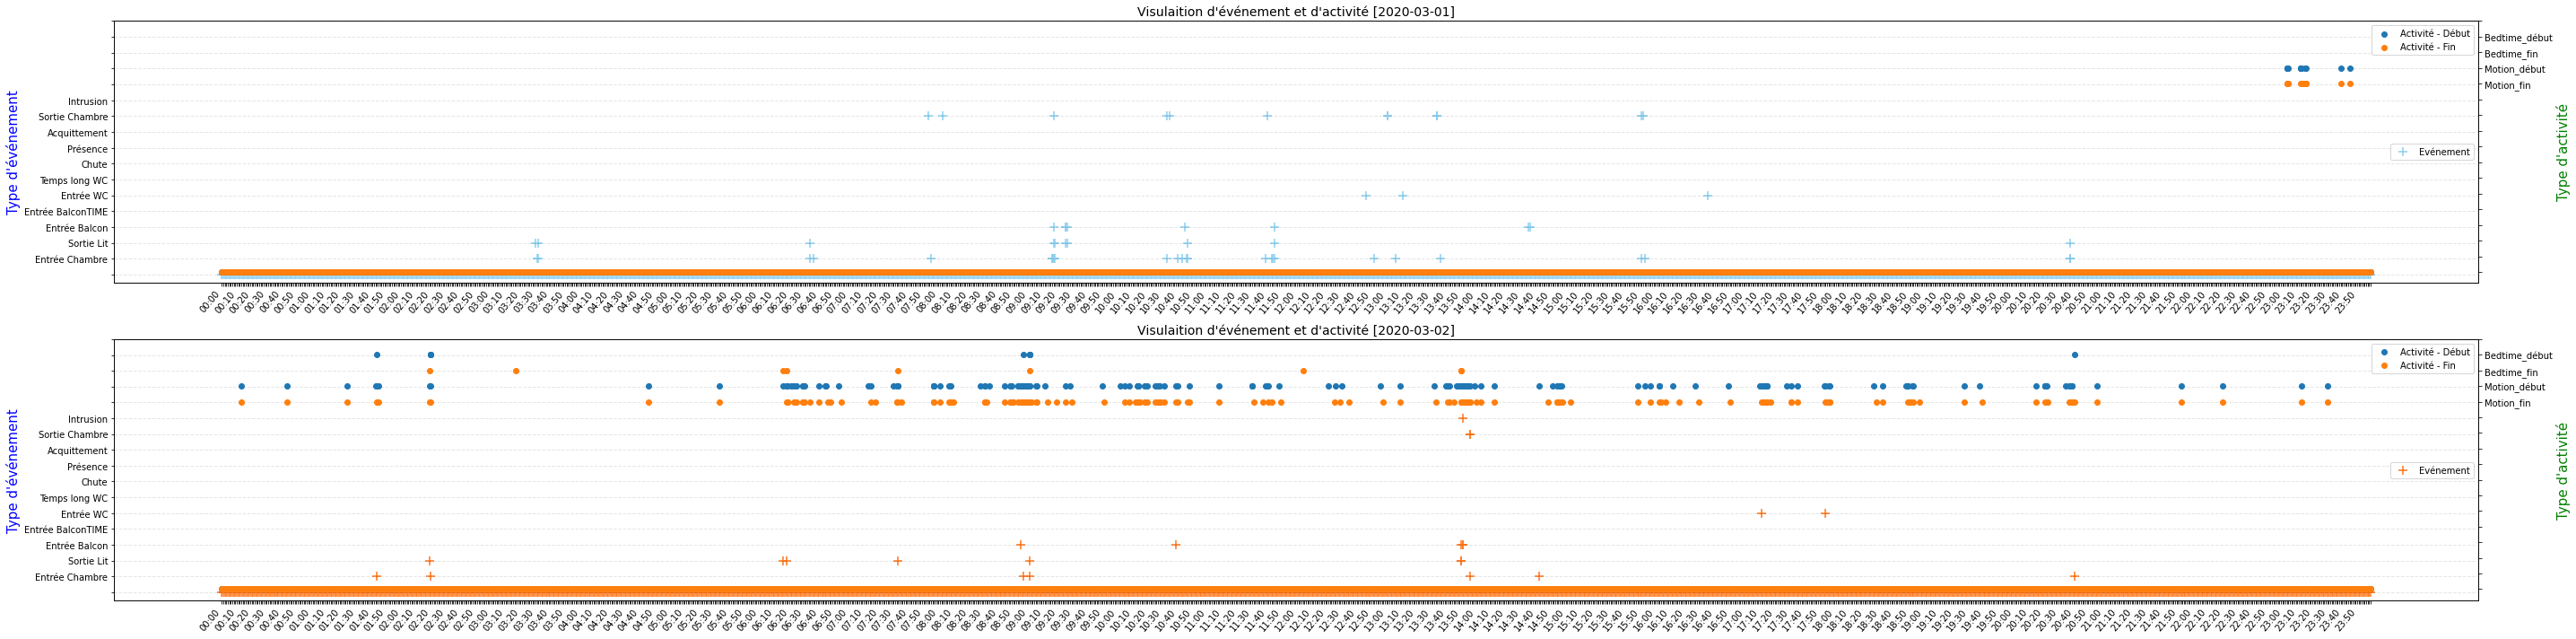

In [ ]:
def plot_par_jour(df1, df2, start_day=None, end_day=None, minute=5, rotation=30, distance_subplot=3, figsize=(50, 10)):
  """
  Fonction pour visualiser les événements et les activités effectués par jour dans un logement
  - df1: DataFrame ou Series des événements
  - df2: DataFrame ou Series des activités
  - start_day: jour de commencement
  - end_day: jour de fin
  - minute: modifier les indices abscisse x
  - rotation: modifier l'angle de rotation des indices
  - distance_subplot: modifier la distance verticale entre les subplots
  - figsize: modifier la taille de figure

  """
  # Transformer l'objet Series vers l'objet DataFrame
  if not isinstance(df1, pd.DataFrame):
    df1 = df1.to_frame()
  if not isinstance(df1, pd.DataFrame):
    df2 = df2.to_frame()

  # Transformer chaîne de caractères vers datetime
  start_day = pd.to_datetime(start_day)
  end_day = pd.to_datetime(end_day)

  # Obtenir l'indice de tous les enregistrements
  if start_day is None and end_day is None:
    # Obtenir les indices
    indices = df1.index.unique()
  # Obtenir l'indice des enregistrements d'une période indiquée
  if start_day is not None  and end_day is not None:
    indices = df1.loc[start_day:end_day].index.unique()

  # Initialiser la figure
  fig, ax1 = plt.subplots(nrows=len(indices), ncols=1, figsize=figsize)
  fig.subplots_adjust(hspace=distance_subplot)

  # Définir la liste de couleur
  colors = ['#FFF200', '#FF7417', '#ED2939', '#FF6FFF', '#FF2400', '#C7EA46', '#89CFEF', '#50C878', '#B660CD', '#DE3163', '#01796F']

  # Visualiser l'événement
  for i, indice in enumerate(indices):
    # Générer les indices de datetime d'un jour par minute
    indice_datetime = [indice + datetime.timedelta(minutes=x) for x in range(0,24*60,1)]
    indice_datetime = [x.strftime('%H:%M') for x in indice_datetime]

    # Initialiser un DataFrame vide pour compléter les indices de 00:00 à 23:59
    df_vide_par_indice = pd.DataFrame(index=indice_datetime, columns=['Type'])
    # Extraire la colonne 'Type' de l'événement et transformer en DataFrame
    df_type = df1.loc[indice]['Type'].to_frame()
    df_type.index = df1.loc[indice]['Heure_minute_debut']
    # Joindre deux DataFrames ci-dessus
    df_vide_type = df_vide_par_indice.append(df_type)
    # Remplir les valeurs manquantes par 0
    df_vide_type.fillna(value=0, inplace=True)

    # Définir label de l'abscisse y à gauche et à droite
    y_label = ['', 'Entrée Chambre', 'Sortie Lit', 'Entrée Balcon', 'Entrée BalconTIME', 'Entrée WC', 'Temps long WC', 'Chute', 'Présence', 'Acquittement',  'Sortie Chambre', 'Intrusion', '', '', '', '', '']
    y_label_1 = ['', '', '', '', '', '', '', '', '', '', '', '', 'Motion_fin', 'Motion_début', 'Bedtime_fin', 'Bedtime_début', '']

    # Cas pour un seul jour
    if len(indices) == 1: 
      # Visualiser les événements d'un jour en fonction du temp
      ax1.scatter(df_vide_type.index, df_vide_type['Type'], c=colors[np.int(np.random.rand(1) * 10)], label='Evénement')      
      ax1.set_ylabel('Type d\'événement', color='b')
      ax1.set_yticks(np.arange(len(y_label)))
      ax1.set_yticklabels(y_label, fontsize=10)
      ax1.set_title("Visualisation d'événement et d'activité [{}]".format(indice.strftime('%Y-%m-%d')), fontsize=12, fontweight=10)
      ax1.legend(loc='center right')

      # Initialiser un DataFrame vide pour compléter les indices d'activité
      df_vide_par_indice_1_debut = pd.DataFrame(index=indice_datetime, columns=['Type'])
      df_vide_par_indice_1_fin = pd.DataFrame(index=indice_datetime, columns=['Type'])

      # Extraire la colonne 'Type' de l'activité et transformer en DataFrame
      df_type_1_debut = df2.loc[indice]['Type'].to_frame()
      df_type_1_debut.index = df2.loc[indice]['Heure_minute_debut']
      df_type_1_fin = df2.loc[indice]['Type'].to_frame()
      df_type_1_fin.index = df2.loc[indice]['Heure_minute_fin']

      # Joindre deux DataFrame ci-dessus
      df_vide_type_1_debut = df_vide_par_indice_1_debut.append(df_type_1_debut)
      df_vide_type_1_fin = df_vide_par_indice_1_fin.append(df_type_1_fin)

      # Remplir les valeurs manquantes par 0
      df_vide_type_1_debut.fillna(value=0, inplace=True)
      df_vide_type_1_fin.fillna(value=0, inplace=True)

      # Ajouter les lignes pointées pour faciliter la lecture de label d'événements
      for j in range(len(y_label)):
        ax1.axhline(j, linewidth=1, linestyle='--', color='black', alpha=0.3)

      # Ajouter une seconde axis y pour visualiser l'activité
      ax2 = ax1.twinx()

    # Cas pour plusieurs jours
    else:
      # Visualiser les événements d'un jour en fonction du temp
      ax1[i].scatter(df_vide_type.index, df_vide_type['Type'], c=colors[np.int(np.random.rand(1) * 10)], label='Evénement', marker='+', s=10**2)
        # plt.legend(ncol=4, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
      ax1[i].set_ylabel('Type d\'événement', color='b', fontsize=15)
      ax1[i].set_yticks(np.arange(len(y_label))) #len(df_vide_type['Type'].unique()) 
      ax1[i].set_yticklabels(y_label, fontsize=10)
      ax1[i].set_title("Visulaition d'événement et d'activité [{}]".format(indice.strftime('%Y-%m-%d')), fontsize=14, fontweight=6)
      ax1[i].legend(loc='center right')

      # Initialiser un DataFrame vide pour compléter les indices
      df_vide_par_indice_1_debut = pd.DataFrame(index=indice_datetime, columns=['Type'])
      df_vide_par_indice_1_fin = pd.DataFrame(index=indice_datetime, columns=['Type'])

      # Extraire la colonne 'Type' de l'activité et transformer en DataFrame
      df_type_1_debut = df2.loc[indice]['Type'].to_frame()
      df_type_1_debut.index = df2.loc[indice]['Heure_minute_debut']
      df_type_1_fin = df2.loc[indice]['Type'].to_frame()
      df_type_1_fin.index = df2.loc[indice]['Heure_minute_fin']

      # Joindre deux DataFrame ci-dessus
      df_vide_type_1_debut = df_vide_par_indice_1_debut.append(df_type_1_debut)
      df_vide_type_1_fin = df_vide_par_indice_1_fin.append(df_type_1_fin)

      # Remplir les valeurs manquantes par 0
      df_vide_type_1_debut.fillna(value=0, inplace=True)
      df_vide_type_1_fin.fillna(value=0, inplace=True)

      # Ajouter les lignes pointées pour faciliter la lecture de label d'activité
      for j in range(len(y_label)):
        ax1[i].axhline(j, linewidth=1, linestyle='--', color='black', alpha=0.1)

      # Ajouter une seconde axis y
      ax2 = ax1[i].twinx()
    # Visualiser les activités d'un jour en fonction du temp
    ax2.scatter(df_vide_type_1_debut.index, df_vide_type_1_debut['Type'].apply(lambda x: x+1 if x==12 else x+2 if x==13 else x), label='Activité - Début')
    ax2.scatter(df_vide_type_1_fin.index, df_vide_type_1_fin['Type'].apply(lambda x: x+1 if x==13 else x), label='Activité - Fin')
    ax2.set_ylabel('Type d\'activité', color='g', fontsize=15)
    ax2.set_yticks(np.arange(len(y_label_1)))
    ax2.set_yticklabels(y_label_1)
    ax2.legend(loc='upper right')
      # Générer label de l'abscisse x tous les N minutes(5 par defaut)
    x_label =  [indice + datetime.timedelta(minutes=x) for x in range(0,24*60, minute)]
    x_label = [x.strftime('%H:%M') for x in x_label]
      # Compléter les labels
    x_label_complet = []
    for i in x_label:
      x_label_complet.append(i)
      for k in range(minute-1):
        x_label_complet.append('')
      # Mettre à jour les labels
    ax2.set_xticks(np.arange(len(x_label_complet)))
    ax2.set_xticklabels(x_label_complet)

  # Adjuster les labels 
  if len(indices) == 1: # Cas pour un jour
    for label in ax1.get_xmajorticklabels() + ax2.get_xmajorticklabels():
      label.set_rotation(rotation)
      label.set_horizontalalignment("right")
  else: # Cas pour plusieurs jour
    for i in range(len(indices)):
      for label in ax1[i].get_xmajorticklabels() + ax2.get_xmajorticklabels():
        label.set_rotation(rotation)
        label.set_horizontalalignment("right")
  plt.tight_layout()
  plt.show()

# Visualiser les événements effectués par jour dans un logement
plot_par_jour(evenement_logement_1, activite_logement_1, start_day='2020-03-01', end_day='2020-03-02', minute=10, rotation=50, figsize=(40,10))

In [ ]:
def iterer_evenement(df_iter):
  """
  Function à itérer tous les enregistrements en pairs ('df_iter -> (eve0,eve1), (eve1,eve2), (eve2, eve3), ...')
  - df_iter: DataFrame ou Series à itérer
  """
  eve_curr, eve_proc = tee(df_iter)
  next(eve_proc, None)
  return zip(eve_curr, eve_proc)


def nb_passage_evenement(df, start_day=None, end_day=None, statistic_mode=None, return_enregistrement_passage=False):
  """
  Fonction à compter le nombre de passage des événements
  - df: DataFrame ou Series des  événements
  - start_day: jour de commencement, indiqué pour le calcul par jour
  - end_day: jour de fint, indiqué pour le calcul par jour
  - statistic_mode: mode de calcul statistique par jour ['Sum/sum', 'Mean/mean'], indiqué pour le calcul par jour
  - return_enregistrement_passage: retoune tous les passages en forme DataFrame
  """
  # Transformer l'objet Series vers l'objet DataFrame
  if not isinstance(df, pd.DataFrame):
    df = df.to_frame()

  # Compter les passages pour une période indiquée
  if start_day is not None and end_day is not None:
    # Transformer chaîne de caractères vers datetime
    start_day = pd.to_datetime(start_day)
    end_day = pd.to_datetime(end_day)
    # Extraire les enregistrements pour une période donnée
    df = df.loc[start_day:end_day]  
    # Obtenir les indices pour compter le nombre de passage d'un jour
    indices = df.index.unique()

  # Extraire la colonne 'Type'
  df = df.set_index('Periode_debut')['Type'].to_frame()
  df['Type'] = df['Type'].map({1:'Entrée Chambre', 2:'Sortie Lit', 3:'Entrée Balcon', 4:'Entrée BalconTIME', 5:'Entrée WC', 6:'Temps long WC', 7:'Chute', 8:'Présence', 9:'Acquittement',  10:'Sortie Chambre', 11:'Intrusion', 12:'motion', 13:'bedtime'})

  # Initialiser l'ensemble pour stocker les passages en éliminant les doublants
  nb_passage_evenement_set = set()
  # Initiliaser la liste pour stocker les passages et nombre correspondant
  nb_passage_evenement_list = []
  enregistrements_de_passage = []

  # Itérer tous les enregistrements en pairs
  for (time_row1, type_row1), (time_row2, type_row2) in iterer_evenement(df.iterrows()):
    # Ajouter les différents passages dans l'ensemble
    temp_eve_1 = '{} -> {}'.format(type_row1['Type'], type_row2['Type'])
    nb_passage_evenement_set.add(temp_eve_1)
    # Stocker le 'Heure' et 'Type' de tous les enregistrements de passage
    enregistrements_de_passage.append([time_row1, time_row2, temp_eve_1])
    # Convertir liste en DataFrame
  enregistrements_de_passage = pd.DataFrame(enregistrements_de_passage, columns=['Heure début', 'Heure fin', 'Passage'])

  if start_day is not None and end_day is not None:
    # Processus à compter pour chaque type de passage
    print("Comptage journalier commence pour [{}] enregistrements du [{}] au [{}]........".format(len(enregistrements_de_passage), indices[0].strftime('%Y-%m-%d'), indices[-1].strftime('%Y-%m-%d')))
    for ind in indices:
      for i, passage in enumerate(list(nb_passage_evenement_set)):
        nb_eve = 0
        for (time_row1_1, type_row1_1), (time_row2_1, type_row2_1) in iterer_evenement(df.iterrows()):
          if time_row1_1.strftime('%Y-%m-%d') == time_row2_1.strftime('%Y-%m-%d') == ind.strftime('%Y-%m-%d'):
            temp_eve_2 = '{} -> {}'.format(type_row1_1['Type'], type_row2_1['Type'])
            if temp_eve_2 == passage:
              nb_eve += 1
        # Stokcer le départ et le terminus de passages et son nombre total
        if nb_eve != 0:
          nb_passage_evenement_list.append([ind, passage.split(' -> ')[0], passage.split(' -> ')[1], passage, nb_eve])
      print("\tBon, calcul pour [{}] fini".format(ind.strftime('%Y-%m-%d')))
    print("Comptage fini pour [{}] types de passage!".format(len(list(nb_passage_evenement_set))))
    # Convertir liste en DataFrame
    nb_passage_evenement_list = pd.DataFrame(nb_passage_evenement_list, columns=['Date', 'Départ', 'Terminus', 'Passage', 'Nombre'])

    # Calculer le résultat statistique par jour
    if statistic_mode in ['Sum', 'sum']:
      nb_passage_evenement_list = nb_passage_evenement_list.groupby(by=['Départ', 'Terminus', 'Passage']).sum().reset_index()

    if statistic_mode in ['Mean', 'mean']:
      nb_passage_evenement_list = nb_passage_evenement_list.groupby(by=['Départ', 'Terminus', 'Passage']).mean().round(2).reset_index()
  else:
    # Processus à compter pour chaque type de passage
    print("Comptage commence pour [{}] enregistrements........".format(len(enregistrements_de_passage)))
    for i, passage in enumerate(list(nb_passage_evenement_set)):
      nb_eve = 0
      for (time_row1_1, type_row1_1), (time_row2_1, type_row2_1) in iterer_evenement(df.iterrows()):
        if type_row1_1['Type'] != type_row2_1['Type']:
          temp_eve_2 = '{} -> {}'.format(type_row1_1['Type'], type_row2_1['Type'])
          if temp_eve_2 == passage:
            nb_eve += 1
      # Stokcer le départ et le terminus de passages et son nombre total
      if nb_eve != 0:
        nb_passage_evenement_list.append([passage.split(' -> ')[0], passage.split(' -> ')[1], passage, nb_eve])
      print("\tBon, calcul pour [{}] passage [{}] fini".format(i, passage))
    print("Comptage fini pour {} types de passage!".format(len(list(nb_passage_evenement_set))))
    # Convertir liste en DataFrame
    nb_passage_evenement_list = pd.DataFrame(nb_passage_evenement_list, columns=['Départ', 'Terminus', 'Passage', 'Nombre'])
    # Trier par 'Passage'
    nb_passage_evenement_list.sort_values(by=['Passage'], inplace=True)
  print(nb_passage_evenement_list)

  if return_enregistrement_passage:
    return nb_passage_evenement_list, enregistrements_de_passage
  else:
    return nb_passage_evenement_list

# Compter le nombre de passage d'événement du logement 1
nb_passage_evenement_df_logement_1, enregistrements_de_passage_df_logement_1 = nb_passage_evenement(evenement_logement_1, start_day='2020-03-01', end_day='2020-03-02', statistic_mode='Mean', return_enregistrement_passage=True)

Comptage journalier commence pour [85] enregistrements du [2020-03-01] au [2020-03-02]........
	Bon, calcul pour [2020-03-01] fini
	Bon, calcul pour [2020-03-02] fini
Comptage fini pour [21] types de passage!
            Départ        Terminus                           Passage  Nombre
0    Entrée Balcon   Entrée Balcon    Entrée Balcon -> Entrée Balcon     3.0
1    Entrée Balcon  Entrée Chambre   Entrée Balcon -> Entrée Chambre     1.0
2    Entrée Balcon       Intrusion        Entrée Balcon -> Intrusion     1.0
3    Entrée Balcon  Sortie Chambre   Entrée Balcon -> Sortie Chambre     1.0
4    Entrée Balcon      Sortie Lit       Entrée Balcon -> Sortie Lit     2.5
5   Entrée Chambre   Entrée Balcon   Entrée Chambre -> Entrée Balcon     4.0
6   Entrée Chambre  Entrée Chambre  Entrée Chambre -> Entrée Chambre     5.0
7   Entrée Chambre       Entrée WC       Entrée Chambre -> Entrée WC     1.5
8   Entrée Chambre  Sortie Chambre  Entrée Chambre -> Sortie Chambre     7.0
9   Entrée Chambre   

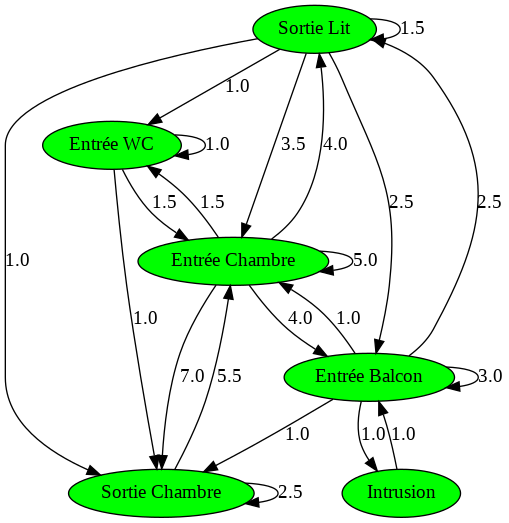

In [ ]:
def plot_graphe_theorique(df):
  """
  Fontion pour tracer le graphe théorique
  - df: DataFrame ou Series de résultat des événements statistiques
  """
  # Transformer l'objet Series vers l'objet DataFrame
  if not isinstance(df, pd.DataFrame):
    df = df.to_frame()

  # Initializer le graphe théorique
  Graph_passage = pydot.Dot(graph_type='digraph')

  # Obtenir tous les noeuds
  node_set = set()
  for i, depart in enumerate(df['Départ']):
    node_set.add(depart)
  for i, term in enumerate(df['Terminus']):
    node_set.add(term)
  
  # Créer des noeuds
  for i, node in enumerate(list(node_set)):
    node = pydot.Node(node, style='filled', fillcolor='green')
    Graph_passage.add_node(node)
  
  # Créer des arcs
  for src, dst, lab in zip(df['Départ'], df['Terminus'], df['Nombre']):
    edge = pydot.Edge(src, dst, label=lab)
    Graph_passage.add_edge(edge)
    
  # Visualiser le graphe
  Graphe_image = Image(Graph_passage.create_png())
  display(Graphe_image)

plot_graphe_theorique(nb_passage_evenement_df_logement_1)

## **Exportation en Excel**

In [ ]:
def exporter_en_excel(df, excel_name=None, sheet_name=None):
  """
  Fontion pour convert DataFrame/Series en Excel et l'exporter
  - df: DataFrame ou Series à exporter
  """
  # Transformer l'objet Series vers l'objet DataFrame
  if not isinstance(df, pd.DataFrame):
    df = df.to_frame()

  # Exporter en fichier Excel
  with pd.ExcelWriter(excel_name) as writer:  
    df.to_excel(writer, sheet_name=sheet_name)

## **Calculs statistiques**

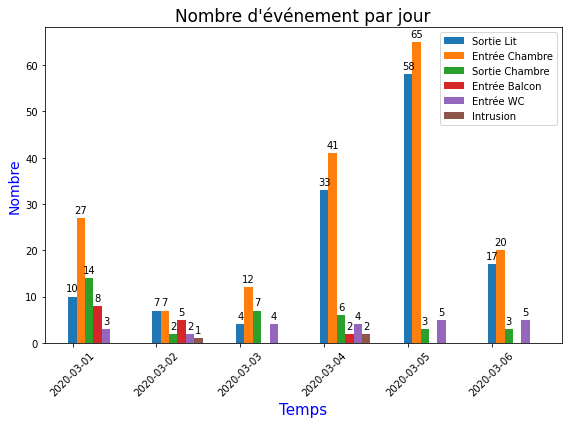



	Conlusion statisitque des événements effectués par jour
 	Période - Du [2020-03-01] au [2020-03-06]
 -------------------------------------------------------------------------
	Nombre total de [Sortie Lit] : 129
 	Nombre moyen de [Sortie Lit] : 21.5
	Nombre total de [Entrée Chambre] : 172
 	Nombre moyen de [Entrée Chambre] : 28.67
	Nombre total de [Sortie Chambre] : 35
 	Nombre moyen de [Sortie Chambre] : 5.83
	Nombre total de [Entrée Balcon] : 15
 	Nombre moyen de [Entrée Balcon] : 2.5
	Nombre total de [Entrée WC] : 23
 	Nombre moyen de [Entrée WC] : 3.83
	Nombre total de [Intrusion] : 3
 	Nombre moyen de [Intrusion] : 0.5


In [ ]:
def nb_evenement_par_jour(df, start_day=None, end_day=None, summary=False, figsize=(8,6)):
  """
  Fonction pour visualiser le nombre des événements par jour serrvant à vérifier des anomalies
  - df: DataFrame ou Series
  - start_day: jour de commencement
  - end_day: jour de fin
  - summary: afficher le rapport statistique
  - figsize: taille de figure
  """
  # Transformer l'objet Series vers l'objet DataFrame
  if not isinstance(df, pd.DataFrame):
    df = df.to_frame()

  # Visualiser tous les enregistrements
  if start_day is None and end_day is None:
    # Obtenir les indices
    indices = df.index.unique()
    type_list = df['Type'].unique()
    # A utiliser pour summary
    start_day = indices[0]
    end_day = indices[-1]
  # Visualiser les enregistrements d'une période indiquée
  else:
    # Transformer datetime string vers Timestampe
    start_day = pd.to_datetime(start_day)
    end_day = pd.to_datetime(end_day)
    indices = pd.date_range(start=start_day, end=end_day)
    type_list = df.loc[start_day:end_day]['Type'].unique()

  # Initialiser la figure
  fig, ax = plt.subplots(figsize=figsize)
  nb_type_list = []
  for k, type_eve in enumerate(type_list):
    temp = []
    # Obtenir le nombre d'événements d'un type
    for i, indice in enumerate(indices):
      temp.append((df.loc[indice]['Type'] == type_eve).sum())
    if type_eve == 1:
      type_eve = 'Entrée Chambre'
    if type_eve == 2:
      type_eve = 'Sortie Lit'
    if type_eve == 3:
      type_eve = 'Entrée Balcon'
    if type_eve == 4:
      type_eve = 'Entrée BalconTIME'
    if type_eve == 5:
      type_eve = 'Entrée WC'
    if type_eve == 6:
      type_eve = 'Temps long WC'
    if type_eve == 7:
      type_eve = 'Chute'
    if type_eve == 8:
      type_eve = 'Présence'
    if type_eve == 9:
      type_eve = 'Acquittement'
    if type_eve == 10:
      type_eve = 'Sortie Chambre'
    if type_eve == 11:
      type_eve = 'Intrusion'
    nb_type_list.append({type_eve:temp})
  # Visuqliser par barplot
  for j, type_dict in enumerate(nb_type_list):
    for key, value in zip(type_dict.keys(), type_dict.values()):
      rects = ax.bar(indices, value, width=0.1, label=key)
      indices = indices+datetime.timedelta(days=0.1)
      for rect in rects:
        height = rect.get_height()
        if height != 0:
          ax.annotate(height, xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
  ax.set_ylabel('Nombre', fontsize=14, color='b')
  ax.set_xlabel('Temps', fontsize=15, color='b')
  ax.set_title('Nombre d\'événement par jour', fontsize=17, fontweight=4)
  ax.tick_params(axis='x', rotation=45)
  ax.legend()
  fig.tight_layout()
  plt.show()

  # Afficher le résultat statitstique
  if summary is True:
    print("\n\n\tConlusion statisitque des événements effectués par jour\n", 
       "=========================================================================\n",
       "\tPériode - Du [{}] au [{}]\n".format(start_day.strftime("%Y-%m-%d"), end_day.strftime("%Y-%m-%d")),
       "-------------------------------------------------------------------------"
       )
    for j, type_dict in enumerate(nb_type_list):
      for key, value in zip(type_dict.keys(), type_dict.values()):
        print("\tNombre total de [{}] : {}\n".format(key, np.int(np.sum(value))),
          "\tNombre moyen de [{}] : {}\n".format(key, np.round(np.mean(value), 2)),
      "=========================================================================")

# Visualiser le nombre d'événement par jour
nb_evenement_par_jour(evenement_logement_1, start_day='2020-03-01', end_day='2020-03-06', summary=True)

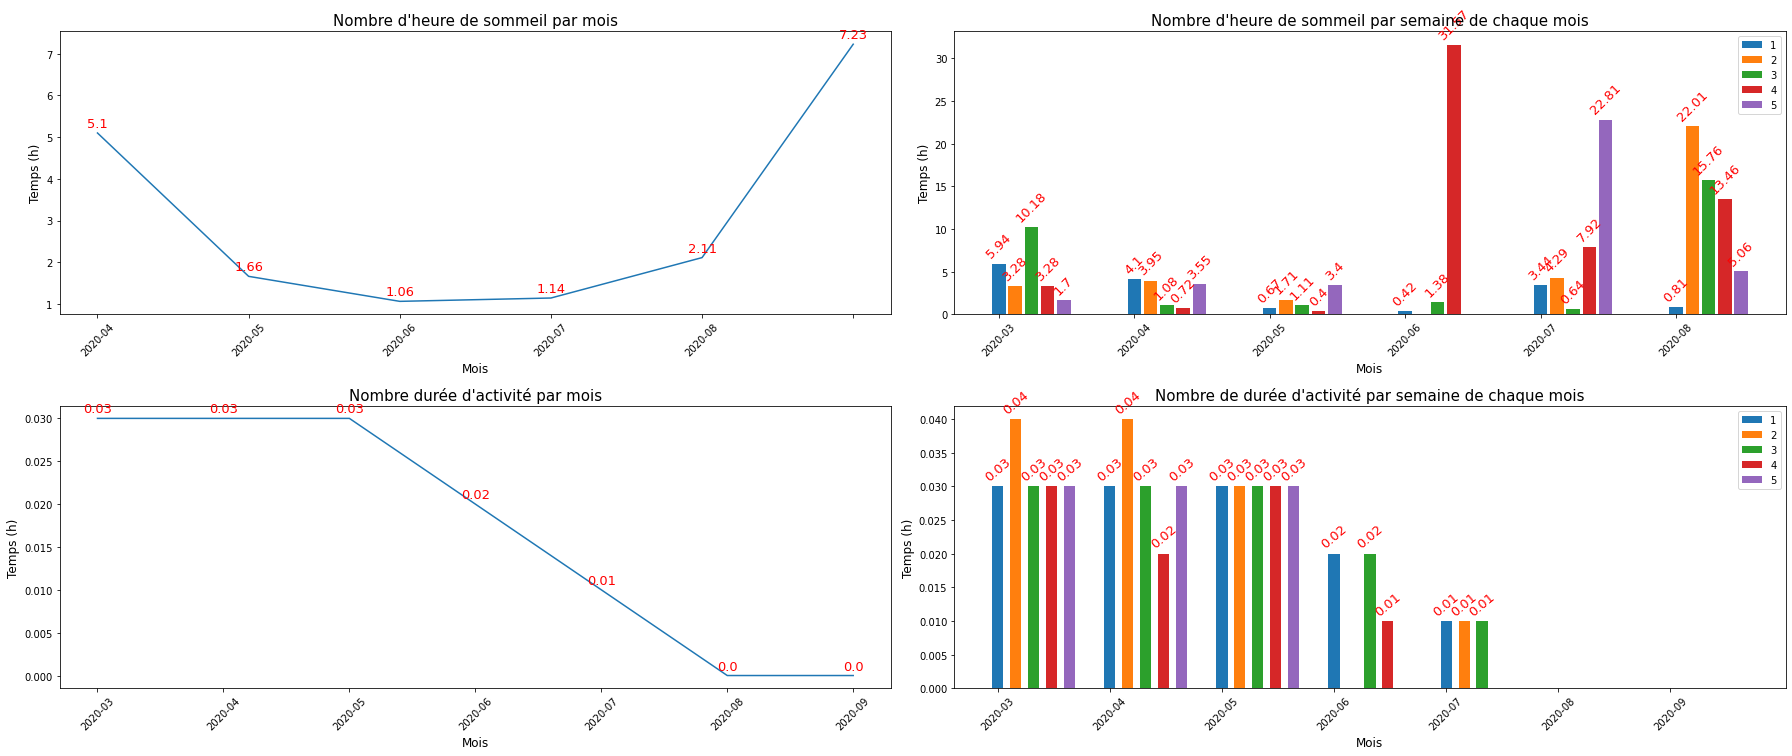

In [ ]:
def duree_sommeil_activite(df, figsize=(25,15)):
  """
  Fonction à calculer le nombre d'heure moyen de sommeil et la durée total d'activité par jour
  - df: DataFrame ou Series
  """
  # Transformer l'objet Series vers l'objet DataFrame
  if not isinstance(df, pd.DataFrame):
    df = df.to_frame()

  # Copier les données
  df_sommeil_activite = df.copy()
  df_sommeil_activite.reset_index(inplace=True)

  # Préparer les colonnes servant au calcul statistique
    # Ajouter la colonne 'Heure_debut' et 'Heure_fin' de date servant à explorer les habitudes de sommeil des personnes agées
  df_sommeil_activite['Heure_debut'] = df_sommeil_activite['Periode_debut'].apply(lambda x: x.strftime('%H'))
  df_sommeil_activite['Heure_fin'] = df_sommeil_activite['Periode_fin'].apply(lambda x: x.strftime('%H'))
    # Ajouter la colonne 'Jour_de_semaine' servant à explorer les habitudes différents pendant 'day-of-week' et 'weekend'
  df_sommeil_activite['Jour_de_semaine'] = df_sommeil_activite['Date début'].apply(lambda x: x.weekday())
    # Ajouter la colonne 'Semaine_de_mois' servant au calcul statistique de sommeil et activité par semaine
  df_sommeil_activite['Semaine_de_mois'] = df_sommeil_activite['Date début'].apply(lambda x: (x.day - 1) // 7 + 1)
    # Ajouter la colonne 'Mois' servant au calcul statistique de sommeil et activité par mois
  df_sommeil_activite['Mois'] = df_sommeil_activite['Date début'].apply(lambda x: x.month)

  # Extaire respectivement les enregistrements d'événement de d'activité
  nb_heure_sommeil_df = df_sommeil_activite.loc[df_sommeil_activite['Type'] == 13][['Date début', 'Heure_debut', 'Heure_fin', 'Temps (h)', 'Jour_de_semaine', 'Semaine_de_mois', 'Mois']] # 13 - bedtime
  duree_activite_df = df_sommeil_activite.loc[df_sommeil_activite['Type'] == 12][['Date début', 'Heure_debut', 'Heure_fin', 'Temps (h)', 'Jour_de_semaine', 'Semaine_de_mois', 'Mois']] # 12 - motion

  # Initialiser figure
  fig = plt.figure(figsize=figsize)

  # Obtenir les indices
  indices_sommeil = nb_heure_sommeil_df['Date début'].apply(lambda x : x.strftime("%Y-%m")).unique()
  indices_activite = duree_activite_df['Date début'].apply(lambda x : x.strftime("%Y-%m")).unique()

  # Calcul statistique de sommeil
    # Par mois
  nb_heure_sommeil_par_mois = nb_heure_sommeil_df[['Mois', 'Temps (h)']]
  nb_heure_sommeil_par_mois = nb_heure_sommeil_par_mois.groupby(by=['Mois']).mean().round(2)
  ax1 = fig.add_subplot(321)
  ax1.plot(nb_heure_sommeil_par_mois)
  ax1.set_title("Nombre d'heure de sommeil par mois", fontsize=15, fontweight=4)
  ax1.set_xlabel("Mois", fontsize=12)
  ax1.set_ylabel("Temps (h)", fontsize=12)
  x_label = np.arange(len(nb_heure_sommeil_par_mois)) + nb_heure_sommeil_par_mois.index[0]
  ax1.set_xticklabels(nb_heure_sommeil_df['Date début'].apply(lambda x : x.strftime("%Y-%m")).unique())
  ax1.tick_params(axis='x', rotation=45)
  for text, loc in zip(nb_heure_sommeil_par_mois['Temps (h)'], x_label):
    ax1.annotate(text, xy=(loc, text), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='r',  fontsize=13)

    # Par semaine
  nb_heure_sommeil_par_semaime = nb_heure_sommeil_df[['Mois', 'Semaine_de_mois', 'Temps (h)']]
  nb_heure_sommeil_par_semaime = nb_heure_sommeil_par_semaime.groupby(by=['Mois', 'Semaine_de_mois']).mean().round(2)
  ax2 = fig.add_subplot(322)
      # Obtenir le nombre de l'indice
  nb_heure_sommeil_par_semaime_index_set = set()
  for k, ind in enumerate(nb_heure_sommeil_par_semaime.index):
    nb_heure_sommeil_par_semaime_index_set.add(ind[0])
    # Obtenir la liste servant au plot bar
  nb_heure_sommeil_par_semaime_list = []
    # Générer l'indice
  nb_heure_sommeil_par_semaime_indice = []
  for mois in nb_heure_sommeil_par_semaime_index_set:
    for i in range(5):
      nb_heure_sommeil_par_semaime_indice.append((mois, i+1))
    # Obtenir la liste par semaine servant à visualisation
  for i in range(5): # Calculer pour 1-5 semaine
    temp_list = []
    count_miss = 1 
    for j, ind in enumerate(nb_heure_sommeil_par_semaime_indice):
      indice_inexist = False
      if ind[1] == i+1 and count_miss <= len(nb_heure_sommeil_par_semaime_index_set):
        try : 
          temp_list.append(nb_heure_sommeil_par_semaime.loc[ind]['Temps (h)'])
          count_miss += 1
        except:
          # print("Indice {} n'exite pas, remplace par value 0".format(ind))
          indice_inexist = True
      if indice_inexist:
        temp_list.append(0)
        count_miss += 1
    nb_heure_sommeil_par_semaime_list.append({i+1:temp_list})
    # Visualiser par barplot
  indices_sommeil = np.arange(len(indices_sommeil))
  for j, semaine_dict in enumerate(nb_heure_sommeil_par_semaime_list):
    for key, value in zip(semaine_dict.keys(), semaine_dict.values()):
      rects = ax2.bar(indices_sommeil, value, width=0.1, label=key)
      indices_sommeil = np.array(indices_sommeil) + 0.12
      for rect in rects:
        height = rect.get_height()
        if height != 0:
          ax2.annotate(height, xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=45, color='r', fontsize=13)
  ax2.set_title("Nombre d'heure de sommeil par semaine de chaque mois", fontsize=15, fontweight=4)
  ax2.legend(loc='best')
  ax2.set_xticks(np.arange(len(indices_sommeil)))
  ax2.set_xticklabels(nb_heure_sommeil_df['Date début'].apply(lambda x : x.strftime("%Y-%m")).unique())
  ax2.tick_params(axis='x', rotation=45)
  ax2.set_xlabel("Mois", fontsize=12)
  ax2.set_ylabel("Temps (h)", fontsize=12)

    # Moyenne pour tous les enregistrements
  nb_heure_sommeil_moyenne = np.round(nb_heure_sommeil_df['Temps (h)'].mean(),2)
  # print("Nombre moyen de nombre d'heure sommeil est [{}]".format(nb_heure_sommeil_moyenne))

  # Calcul statistique d'activité
    # Par mois
  duree_activite_par_mois = duree_activite_df[['Mois', 'Temps (h)']]
  duree_activite_par_mois = duree_activite_par_mois.groupby(by=['Mois']).mean().round(2)
  ax3 = fig.add_subplot(323)
  ax3.plot(duree_activite_par_mois)
  ax3.set_title("Nombre durée d'activité par mois", fontsize=15, fontweight=4)
  ax3.set_xlabel("Mois", fontsize=12)
  ax3.set_ylabel("Temps (h)", fontsize=12)
  x_label = np.arange(len(duree_activite_par_mois)) + duree_activite_par_mois.index[0]
  ax3.set_xticks(x_label)
  ax3.set_xticklabels(duree_activite_df['Date début'].apply(lambda x : x.strftime("%Y-%m")).unique())
  ax3.tick_params(axis='x', rotation=45)
  for text, loc in zip(duree_activite_par_mois['Temps (h)'], x_label):
    ax3.annotate(text, xy=(loc, text), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='r',  fontsize=13)

    # Par semaine
  duree_activite_par_semaime = duree_activite_df[['Mois', 'Semaine_de_mois', 'Temps (h)']]
  duree_activite_par_semaime = duree_activite_par_semaime.groupby(by=['Mois', 'Semaine_de_mois']).mean().round(2)
  ax4 = fig.add_subplot(324)
      # Obtenir le nombre de l'indice
  duree_activite_par_semaime_index_set = set()
  for k, ind in enumerate(duree_activite_par_semaime.index):
    duree_activite_par_semaime_index_set.add(ind[0])
    # Obtenir la liste servant au plot bar
  duree_activite_par_semaime_list = []
    # Générer l'indice
  duree_activite_par_semaime_indice = []
  for mois in duree_activite_par_semaime_index_set:
    for i in range(5):
      duree_activite_par_semaime_indice.append((mois, i+1))
    # Obtenir la liste par semaine servant à visualisation
  for i in range(5): # Calculer pour 1-5 semaine
    temp_list = []
    count_miss = 1 
    for j, ind in enumerate(duree_activite_par_semaime_indice):
      indice_inexist = False
      if ind[1] == i+1 and count_miss <= len(duree_activite_par_semaime_index_set):
        try : 
          temp_list.append(duree_activite_par_semaime.loc[ind]['Temps (h)'])
          count_miss += 1
        except:
          # print("Indice {} n'exite pas, remplace par value 0".format(ind))
          indice_inexist = True
      if indice_inexist:
        temp_list.append(0)
        count_miss += 1
    duree_activite_par_semaime_list.append({i+1:temp_list})
    # Visualiser par barplot
  indices_activite = np.arange(len(indices_activite))
  for j, semaine_dict in enumerate(duree_activite_par_semaime_list):
    for key, value in zip(semaine_dict.keys(), semaine_dict.values()):
      rects = ax4.bar(indices_activite, value, width=0.1, label=key)
      indices_activite = np.array(indices_activite) + 0.16
      for rect in rects:
        height = rect.get_height()
        if height != 0:
          ax4.annotate(height, xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom' ,rotation=40, color='r',  fontsize=13)
  ax4.set_title("Nombre de durée d'activité par semaine de chaque mois", fontsize=15, fontweight=4)
  ax4.legend(loc='best')
  ax4.set_xticks(np.arange(len(indices_activite)))
  ax4.set_xticklabels(duree_activite_df['Date début'].apply(lambda x : x.strftime("%Y-%m")).unique())
  ax4.tick_params(axis='x', rotation=45)
  ax4.set_xlabel("Mois", fontsize=12)
  ax4.set_ylabel("Temps (h)", fontsize=12)

    # Moyenne pour tous les enregistrements
  duree_activite_moyenne = np.round(duree_activite_df['Temps (h)'].mean(), 2)
  # print("Nombre moyen de durée d'activité est [{}]".format(duree_activite_moyenne))

  plt.tight_layout()
  plt.show()

# Obtenir le nombre d'heure de sommeil et la durée d'actvité pour logement 1
duree_sommeil_activite(activite_logement_1)